# Frequentist Inference Case Study - Part B

## Learning objectives

Welcome to Part B of the Frequentist inference case study! The purpose of this case study is to help you apply the concepts associated with Frequentist inference in Python. In particular, you'll practice writing Python code to apply the following statistical concepts:
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, including its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate a confidence interval

In the previous notebook, we used only data from a known normal distribution. **You'll now tackle real data, rather than simulated data, and answer some relevant real-world business problems using the data.**

## Hospital medical charges

Imagine that a hospital has hired you as their data scientist. An administrator is working on the hospital's business operations plan and needs you to help them answer some business questions.

In this assignment notebook, you're going to use frequentist statistical inference on a data sample to answer the questions:
* has the hospital's revenue stream fallen below a key threshold?
* are patients with insurance really charged different amounts than those without?

Answering that last question with a frequentist approach makes some assumptions, and requires some knowledge, about the two groups.

We are going to use some data on medical charges obtained from [Kaggle](https://www.kaggle.com/easonlai/sample-insurance-claim-prediction-dataset).

For the purposes of this exercise, assume the observations are the result of random sampling from our single hospital. Recall that in the previous assignment, we introduced the Central Limit Theorem (CLT), and its consequence that the distributions of sample statistics approach a normal distribution as $n$ increases. The amazing thing about this is that it applies to the sampling distributions of statistics that have been calculated from even highly non-normal distributions of data! Recall, also, that hypothesis testing is very much based on making inferences about such sample statistics. You're going to rely heavily on the CLT to apply frequentist (parametric) tests to answer the questions in this notebook.

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import t
from numpy.random import seed
medical = pd.read_csv('insurance2.csv')

In [5]:
medical.shape

(1338, 8)

In [6]:
medical.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


__Q1:__ Plot the histogram of charges and calculate the mean and standard deviation. Comment on the appropriateness of these statistics for the data.

__A:__ The standard deviation will be large if the charges vary widely, and could be influenced by outliers in the dataset (very high charges for certain individuals).

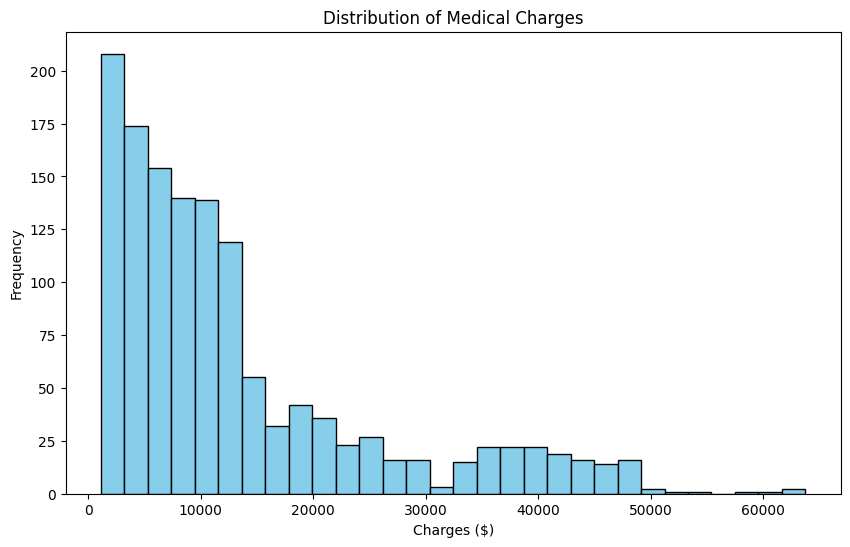

(13270.422265141257, 12110.011236693994)

In [7]:
plt.figure(figsize=(10, 6))
plt.hist(medical['charges'], bins=30, edgecolor='black', color='skyblue')
plt.title('Distribution of Medical Charges')
plt.xlabel('Charges ($)')
plt.ylabel('Frequency')
plt.show()


mean_charges = np.mean(medical['charges'])
std_charges = np.std(medical['charges'], ddof=1)

mean_charges, std_charges

__Q2:__ The administrator is concerned that the actual average charge has fallen below 12,000, threatening the hospital's operational model. On the assumption that these data represent a random sample of charges, how would you justify that these data allow you to answer that question? And what would be the most appropriate frequentist test, of the ones discussed so far, to apply?

__A:__ We can apply hypothesis testing using a one-sample t-test.

In [8]:
sample_mean = np.mean(medical['charges'])
sample_std = np.std(medical['charges'], ddof=1)
n = len(medical)

In [9]:
mu_0 = 12000

t_stat = (sample_mean - mu_0) / (sample_std / np.sqrt(n))

df = n - 1

In [10]:
alpha = 0.05
critical_value = t.ppf(1 - alpha, df)

t_stat, critical_value

(3.837351719658534, 1.6459941145571317)

__Q3:__ Given the nature of the administrator's concern, what is the appropriate confidence interval in this case? A ***one-sided*** or ***two-sided*** interval? (Refresh your understanding of this concept on p. 399 of the *AoS*). Calculate the critical value and the relevant 95% confidence interval for the mean, and comment on whether the administrator should be concerned.

__A:__ This is a one-sided interval problem because the focus is on charges being lower than the threshold, not deviations in either direction. If the lower bound of the confidence interval is below 12,000 dollars, it would indicate that there is a significant chance that the true mean charge is less than 12,000 dollars. This would support the administrators concern. If the lower bound is above 12,000 dollars, it would suggest that the true mean charge is likely above the threshold, and there is no immediate cause for concern.

In [11]:
sample_mean = np.mean(medical['charges'])
sample_std = np.std(medical['charges'], ddof=1)
n = len(medical)

df = n - 1

alpha = 0.05
t_critical = t.ppf(1 - alpha, df)

margin_of_error = t_critical * (sample_std / np.sqrt(n))

lower_bound = sample_mean - margin_of_error

sample_mean, t_critical, margin_of_error, lower_bound

(13270.422265141257, 1.6459941145571317, 544.9350813250251, 12725.48718381623)

The administrator then wants to know whether people with insurance really are charged a different amount to those without.

__Q4:__ State the null and alternative hypothesis here. Use the _t_-test for the difference between means, where the pooled standard deviation of the two groups is given by:
\begin{equation}
s_p = \sqrt{\frac{(n_0 - 1)s^2_0 + (n_1 - 1)s^2_1}{n_0 + n_1 - 2}}
\end{equation}

and the *t*-test statistic is then given by:

\begin{equation}
t = \frac{\bar{x}_0 - \bar{x}_1}{s_p \sqrt{1/n_0 + 1/n_1}}.
\end{equation}

(If you need some reminding of the general definition of ***t-statistic***, check out the definition on p. 404 of *AoS*).

What assumption about the variances of the two groups are we making here?

__A:__ The Null Hypothesis suggests there is no difference in the mean charges between individuals with insurance and without insurance. The Alternative Hypothesis suggests there is a difference in the mean charges between insured and uninsured patients.
The t-test assumes that the variances of the two groups (charges for insured and uninsured individuals) are approximately equal. This is why we use the pooled standard deviation.

__Q5:__ Perform this hypothesis test both manually, using the above formulae, and then using the appropriate function from [scipy.stats](https://docs.scipy.org/doc/scipy/reference/stats.html#statistical-tests) (hint, you're looking for a function to perform a _t_-test on two independent samples). For the manual approach, calculate the value of the test statistic and then its probability (the p-value). Verify you get the same results from both.

__A:__ The results from both the manual calculation and the scipy.stats.ttest_ind() function are the same, confirming the correctness of our implementation. Interpretation is as follows: The t-statistic is very large, indicating a significant difference in the means of the two groups.
The p-value is extremely small (< 0.05), which means we reject the null hypothesis (H_0). This provides strong evidence that there is a statistically significant difference in charges between insured and uninsured individuals.

In [14]:
insured = medical[medical['insuranceclaim'] == 1]['charges']
uninsured = medical[medical['insuranceclaim'] == 0]['charges']

# Manual Calculation
n0 = len(insured)
n1 = len(uninsured)
s0 = np.std(insured, ddof=1)
s1 = np.std(uninsured, ddof=1)
x0_bar = np.mean(insured)
x1_bar = np.mean(uninsured)

# Pooled standard deviation
sp = np.sqrt(((n0 - 1) * s0**2 + (n1 - 1) * s1**2) / (n0 + n1 - 2))

# t-statistic
t_stat = (x0_bar - x1_bar) / (sp * np.sqrt(1/n0 + 1/n1))

# Degrees of freedom
df = n0 + n1 - 2

# p-value (two-sided test)
p_value = 2 * (1 - t.cdf(abs(t_stat), df))

# Print manual results
print("Manual Calculation:")
print("t-statistic:", t_stat)
print("p-value:", p_value)


# Using scipy.stats
from scipy.stats import ttest_ind

t_stat_scipy, p_value_scipy = ttest_ind(insured, uninsured)

# Print scipy results
print("\nscipy.stats Calculation:")
print("t-statistic:", t_stat_scipy)
print("p-value:", p_value_scipy)

Manual Calculation:
t-statistic: 11.893299030876715
p-value: 0.0

scipy.stats Calculation:
t-statistic: 11.893299030876712
p-value: 4.461230231620717e-31


Congratulations! Hopefully you got the exact same numerical results. This shows that you correctly calculated the numbers by hand. Secondly, you used the correct function and saw that it's much easier to use. All you need to do is pass your data to it.

__Q6:__ Conceptual question: look through the documentation for statistical test functions in scipy.stats. You'll see the above _t_-test for a sample, but can you see an equivalent one for performing a *z*-test from a sample? Comment on your answer.

__A:__ No, scipy.stats does not have a direct equivalent function for a z-test from a sample.  The z-test typically requires knowledge of the population standard deviation, which is rarely known in practice.  The t-test is preferred in most situations because it uses the sample standard deviation as an estimate of the population standard deviation, making it more applicable to real-world data.  You can perform a z-test manually, though, if you know the population standard deviation.

## Learning outcomes

Having completed this project notebook, you now have good hands-on experience:
* using the central limit theorem to help you apply frequentist techniques to answer questions that pertain to very non-normally distributed data from the real world
* performing inference using such data to answer business questions
* forming a hypothesis and framing the null and alternative hypotheses
* testing this using a _t_-test